In [ ]:
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

1. Persiapan Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mendefinisikan path ke dataset di Google Drive
path_to_dataset = '/content/drive/MyDrive/datasets/nyoba doang asli'

Membuat instance ImageDataGenerator untuk augmentasi gambar

In [ ]:
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

Memuat dataset dari Google Drive

In [ ]:
train_dataset = image_generator.flow_from_directory(
    directory=path_to_dataset,
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)

validation_dataset = image_generator.flow_from_directory(
    directory=path_to_dataset,
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)

Found 650 images belonging to 5 classes.
Found 160 images belonging to 5 classes.


In [ ]:
# Menentukan jumlah kelas (num_classes) berdasarkan jumlah subfolder dalam dataset
num_classes = len(train_dataset.class_indices)

2. Pembuatan Model

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

# Load the MobileNet model
pre_trained_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

pre_trained_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
# Menambahkan layer kustom di atas model pre-trained
model = tf.keras.Sequential([
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

3. Pelatihan Model

In [ ]:
history = model.fit(train_dataset,
              validation_data=validation_dataset,
              epochs=10,
              verbose = 1
          )

Epoch 1/10
21/21 [==============================] - 298s 14s/step - loss: 1.0290 - accuracy: 0.6462 - val_loss: 0.8153 - val_accuracy: 0.6062
Epoch 2/10
21/21 [==============================] - 180s 9s/step - loss: 0.4514 - accuracy: 0.8446 - val_loss: 0.7191 - val_accuracy: 0.6687
Epoch 3/10
21/21 [==============================] - 188s 9s/step - loss: 0.2431 - accuracy: 0.9154 - val_loss: 0.5129 - val_accuracy: 0.7875
Epoch 4/10
21/21 [==============================] - 195s 9s/step - loss: 0.1553 - accuracy: 0.9569 - val_loss: 0.6313 - val_accuracy: 0.7437
Epoch 5/10
21/21 [==============================] - 192s 9s/step - loss: 0.1070 - accuracy: 0.9631 - val_loss: 0.1701 - val_accuracy: 0.9438
Epoch 6/10
21/21 [==============================] - 194s 9s/step - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.3156 - val_accuracy: 0.8625
Epoch 7/10
21/21 [==============================] - 185s 9s/step - loss: 0.0632 - accuracy: 0.9846 - val_loss: 0.3159 - val_accuracy: 0.8687
Epoch 8/10
2

4. Deskripsi Gambar

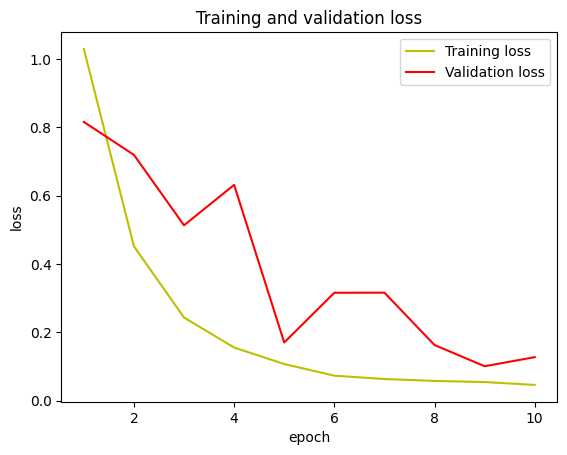

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

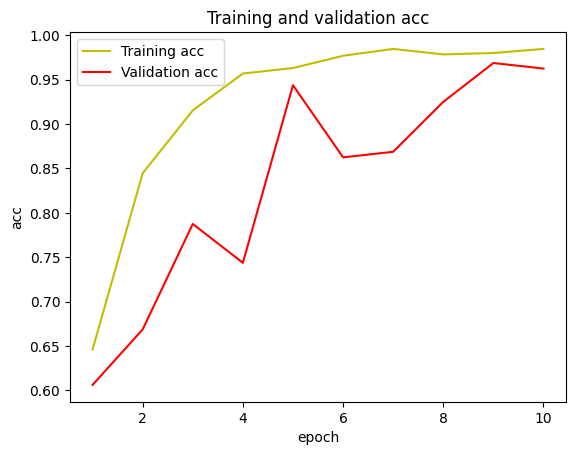

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/mdlh5.h5')
model=load_model('/content/mdlh5.h5')

In [ ]:
# Mengklasifikasikan gambar menggunakan model
# Ambil contoh satu gambar untuk dijadikan deskripsi dan rekomendasi
image_path = '/content/kain2.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)
image_array = image_array / 255.0  # Normalisasi

In [ ]:
class_name = train_dataset.class_indices
class_name = list(dict.keys(class_name))
print(class_name)

['Botol', 'Kaca', 'Kain', 'Kaleng', 'Plastik']


In [ ]:
predictions = model.predict(image_array)
predicted_class = tf.argmax(predictions[0])

predicted_class = tf.argmax(predictions[0])
description = ""
if predicted_class == 0:
    description = "Ini adalah botol."
elif predicted_class == 1:
    description = "Ini adalah kaca."
elif predicted_class == 2:
    description = "Ini adalah kain."
elif predicted_class == 3:
    description = "Ini adalah kaleng."
elif predicted_class == 4:
    description = "Ini adalah plastik."

print(description)

1/1 [==============================] - 0s 117ms/step
Ini adalah kaleng.


5. Rekomendasi Daur Ulang

In [ ]:
# Buat rekomendasi berdasarkan kelas yang diprediksi
recommendation = ""
if predicted_class == 0:
    recommendation = "Daur ulang botol plastik dengan memasukkannya ke tempat pengumpulan botol plastik terpisah."
elif predicted_class == 1:
    recommendation = "Daur ulang kaleng aluminium dengan memasukkannya ke tempat pengumpulan kaleng aluminium terpisah."
elif predicted_class == 2:
    recommendation = "Daur ulang kertas dengan memasukkannya ke tempat pengumpulan kertas terpisah."
elif predicted_class == 3:
    recommendation = "Daur ulang kardus dengan memasukkannya ke tempat pengumpulan kardus terpisah."
elif predicted_class == 4:
    recommendation = "Daur ulang botol kaca dengan memasukkannya ke tempat pengumpulan botol kaca terpisah."
elif predicted_class == 5:
    recommendation = "Hindari penggunaan kantong plastik. Gantilah dengan tas belanja yang dapat digunakan berulang kali."

In [ ]:
# Cetak deskripsi dan rekomendasi
print("Deskripsi: ", description)
print("Rekomendasi: ", recommendation)